<a href="https://colab.research.google.com/github/Eval-code/Analisis-Sosial-Media/blob/main/stdudikasus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HITUNG BoW

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

text = """
Teknologi kecerdasan buatan semakin berkembang pesat dalam
beberapa tahun terakhir.
Banyak perusahaan memanfaatkan kecerdasan buatan untuk
meningkatkan efisiensi dan kualitas layanan.
Namun, perkembangan teknologi ini juga menimbulkan tantangan,
seperti keamanan data dan etika penggunaan.
Oleh karena itu, penelitian dalam bidang kecerdasan buatan menjadi
semakin penting untuk masa depan.
"""

# Inisialisasi CountVectorizer
# Tokenisasi otomatis akan dilakukan di sini
vectorizer = CountVectorizer()

# Fit dan Transform teks menjadi matriks BoW
bow_matrix = vectorizer.fit_transform([text])

# Menampilkan Kosa Kata (Fitur/Kata)
print("Kosa Kata (Fitur):", vectorizer.get_feature_names_out())

# Menampilkan Vektor BoW (Frekuensi)
# Baris pertama (index 0) adalah vektor BoW untuk teks tersebut
print("Vektor BoW (Frekuensi):", bow_matrix.toarray()[0])

Kosa Kata (Fitur): ['banyak' 'beberapa' 'berkembang' 'bidang' 'buatan' 'dalam' 'dan' 'data'
 'depan' 'efisiensi' 'etika' 'ini' 'itu' 'juga' 'karena' 'keamanan'
 'kecerdasan' 'kualitas' 'layanan' 'masa' 'memanfaatkan' 'menimbulkan'
 'meningkatkan' 'menjadi' 'namun' 'oleh' 'penelitian' 'penggunaan'
 'penting' 'perkembangan' 'perusahaan' 'pesat' 'semakin' 'seperti' 'tahun'
 'tantangan' 'teknologi' 'terakhir' 'untuk']
Vektor BoW (Frekuensi): [1 1 1 1 3 2 2 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2
 1 2]


MATRIK BoW

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Teks yang akan dianalisis
text_data = """
Teknologi kecerdasan buatan semakin berkembang pesat dalam
beberapa tahun terakhir.
Banyak perusahaan memanfaatkan kecerdasan buatan untuk
meningkatkan efisiensi dan kualitas layanan.
Namun, perkembangan teknologi ini juga menimbulkan tantangan,
seperti keamanan data dan etika penggunaan.
Oleh karena itu, penelitian dalam bidang kecerdasan buatan menjadi
semakin penting untuk masa depan.
"""

# CountVectorizer otomatis menangani:
# 1. Lowercasing (mengubah semua huruf menjadi kecil)
# 2. Tokenisasi (memisahkan teks menjadi kata-kata)
# 3. Pembuatan Kosa Kata (Vocabulary)
vectorizer = CountVectorizer()

# Fit dan Transform teks menjadi Matriks BoW
# Kita memasukkan teks Anda ke dalam list agar diperlakukan sebagai satu dokumen
bow_matrix_sparse = vectorizer.fit_transform([text_data])

# Mengubah matriks sparse menjadi array NumPy (bentuk matriks standar)
bow_matrix_array = bow_matrix_sparse.toarray()

# Mengambil daftar semua kata unik (Fitur/Kolom)
feature_names = vectorizer.get_feature_names_out()

# 3. Menampilkan Matriks dalam Format DataFrame (lebih mudah dibaca)
df_bow = pd.DataFrame(
    bow_matrix_array,
    columns=feature_names,
    index=['Dokumen_1'] # Karena kita hanya menganalisis 1 teks
)

print("--- Kosa Kata (Fitur) ---")
# Menampilkan semua kata yang ditemukan (kolom matriks)
print(feature_names)

print("\n--- Matriks Bag-of-Words (Frekuensi Kata) ---")
# Menampilkan Matriks BoW
print(df_bow)

--- Kosa Kata (Fitur) ---
['banyak' 'beberapa' 'berkembang' 'bidang' 'buatan' 'dalam' 'dan' 'data'
 'depan' 'efisiensi' 'etika' 'ini' 'itu' 'juga' 'karena' 'keamanan'
 'kecerdasan' 'kualitas' 'layanan' 'masa' 'memanfaatkan' 'menimbulkan'
 'meningkatkan' 'menjadi' 'namun' 'oleh' 'penelitian' 'penggunaan'
 'penting' 'perkembangan' 'perusahaan' 'pesat' 'semakin' 'seperti' 'tahun'
 'tantangan' 'teknologi' 'terakhir' 'untuk']

--- Matriks Bag-of-Words (Frekuensi Kata) ---
           banyak  beberapa  berkembang  bidang  buatan  dalam  dan  data  \
Dokumen_1       1         1           1       1       3      2    2     1   

           depan  efisiensi  ...  perkembangan  perusahaan  pesat  semakin  \
Dokumen_1      1          1  ...             1           1      1        2   

           seperti  tahun  tantangan  teknologi  terakhir  untuk  
Dokumen_1        1      1          1          2         1      2  

[1 rows x 39 columns]


INTERPRETASI
 kata tertingggi dimiliki oleh kata buatan, kecerdasan, dan dan. Hal ini secara jelas mengidentifikasi frasa "kecerdasan buatan" sebagai subjek utama dan paling sering dibahas dalam teks.

ANALISIS FREKUENSI

In [1]:
from collections import Counter
import re

# Dataset BARU (Teks Anda)
corpus_text = """
Teknologi kecerdasan buatan semakin berkembang pesat dalam
beberapa tahun terakhir.
Banyak perusahaan memanfaatkan kecerdasan buatan untuk
meningkatkan efisiensi dan kualitas layanan.
Namun, perkembangan teknologi ini juga menimbulkan tantangan,
seperti keamanan data dan etika penggunaan.
Oleh karena itu, penelitian dalam bidang kecerdasan buatan menjadi
semakin penting untuk masa depan.
"""

# Memecah teks menjadi daftar kalimat atau unit teks
corpus = corpus_text.split('\n')

# Preprocessing
tokens = []
for sentence in corpus:
    # 1. Lowercasing + Tokenisasi (memilih semua kata)
    words = re.findall(r'\w+', sentence.lower())
    tokens.extend(words)

# Hitung frekuensi
freq = Counter(tokens)

# Tampilkan hasil
print("Frekuensi kata:")
# Mengurutkan berdasarkan jumlah terbanyak (most_common)
for word, count in freq.most_common():
    print(f"Kata: '{word}', Frekuensi: {count}")

Frekuensi kata:
Kata: 'kecerdasan', Frekuensi: 3
Kata: 'buatan', Frekuensi: 3
Kata: 'teknologi', Frekuensi: 2
Kata: 'semakin', Frekuensi: 2
Kata: 'dalam', Frekuensi: 2
Kata: 'untuk', Frekuensi: 2
Kata: 'dan', Frekuensi: 2
Kata: 'berkembang', Frekuensi: 1
Kata: 'pesat', Frekuensi: 1
Kata: 'beberapa', Frekuensi: 1
Kata: 'tahun', Frekuensi: 1
Kata: 'terakhir', Frekuensi: 1
Kata: 'banyak', Frekuensi: 1
Kata: 'perusahaan', Frekuensi: 1
Kata: 'memanfaatkan', Frekuensi: 1
Kata: 'meningkatkan', Frekuensi: 1
Kata: 'efisiensi', Frekuensi: 1
Kata: 'kualitas', Frekuensi: 1
Kata: 'layanan', Frekuensi: 1
Kata: 'namun', Frekuensi: 1
Kata: 'perkembangan', Frekuensi: 1
Kata: 'ini', Frekuensi: 1
Kata: 'juga', Frekuensi: 1
Kata: 'menimbulkan', Frekuensi: 1
Kata: 'tantangan', Frekuensi: 1
Kata: 'seperti', Frekuensi: 1
Kata: 'keamanan', Frekuensi: 1
Kata: 'data', Frekuensi: 1
Kata: 'etika', Frekuensi: 1
Kata: 'penggunaan', Frekuensi: 1
Kata: 'oleh', Frekuensi: 1
Kata: 'karena', Frekuensi: 1
Kata: 'itu', Fr

ANALISIS CO-OCCURRENCE

In [2]:
import itertools
import pandas as pd
from collections import Counter
import re # Diperlukan untuk tokenisasi

# Teks Baru Anda
corpus_text = """
Teknologi kecerdasan buatan semakin berkembang pesat dalam
beberapa tahun terakhir.
Banyak perusahaan memanfaatkan kecerdasan buatan untuk
meningkatkan efisiensi dan kualitas layanan.
Namun, perkembangan teknologi ini juga menimbulkan tantangan,
seperti keamanan data dan etika penggunaan.
Oleh karena itu, penelitian dalam bidang kecerdasan buatan menjadi
semakin penting untuk masa depan.
"""

# Memecah teks menjadi daftar kalimat/unit teks
corpus = corpus_text.split('\n')

# Tokenisasi per kalimat (lowercasing + re.findall)
tokenized = [re.findall(r'\w+', sentence.lower()) for sentence in corpus]

# Menghitung pasangan kata (co-occurrence)
co_occurrence = Counter()

for sentence in tokenized:
    # Mengambil semua kombinasi pasangan (permutasi) dalam satu kalimat
    for pair in itertools.combinations(sentence, 2):
        # tuple(sorted(pair)) memastikan urutan pasangan selalu sama,
        # misal: ('kecerdasan', 'buatan') dihitung sama dengan ('buatan', 'kecerdasan')
        co_occurrence[tuple(sorted(pair))] += 1

# Tampilkan hasil
df_co = pd.DataFrame(co_occurrence.items(), columns=["Pair", "Count"])
print("Hasil Co-occurrence (Pasangan Kata):")
print("-" * 50)
print(df_co.sort_values(by="Count", ascending=False))

Hasil Co-occurrence (Pasangan Kata):
--------------------------------------------------
                        Pair  Count
6       (buatan, kecerdasan)      3
14           (buatan, dalam)      2
10       (dalam, kecerdasan)      2
2       (semakin, teknologi)      1
3    (berkembang, teknologi)      1
..                       ...    ...
122          (masa, penting)      1
123         (depan, penting)      1
124            (masa, untuk)      1
125           (depan, untuk)      1
126            (depan, masa)      1

[127 rows x 2 columns]


VISUALISASI DARI HITUNG CO-OCCURRENCE

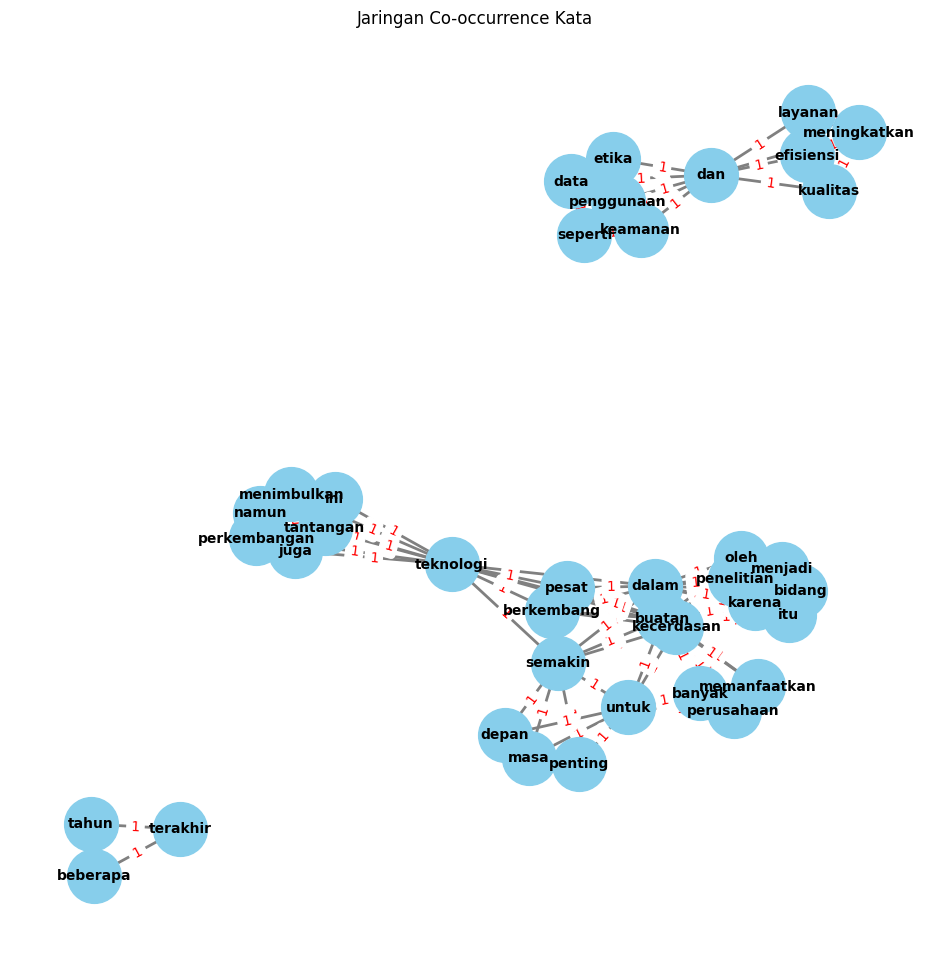

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import itertools
from collections import Counter
import re

# Teks Anda
corpus_text = """
Teknologi kecerdasan buatan semakin berkembang pesat dalam
beberapa tahun terakhir.
Banyak perusahaan memanfaatkan kecerdasan buatan untuk
meningkatkan efisiensi dan kualitas layanan.
Namun, perkembangan teknologi ini juga menimbulkan tantangan,
seperti keamanan data dan etika penggunaan.
Oleh karena itu, penelitian dalam bidang kecerdasan buatan menjadi
semakin penting untuk masa depan.
"""
corpus = corpus_text.split('\n')

# 1. Menghitung Co-occurrence (dari langkah sebelumnya)
tokenized = [re.findall(r'\w+', sentence.lower()) for sentence in corpus]
co_occurrence = Counter()
for sentence in tokenized:
    for pair in itertools.combinations(sentence, 2):
        co_occurrence[tuple(sorted(pair))] += 1

# 2. Membangun dan Menggambar Grafik
G = nx.Graph()

# Menambahkan Edge (Garis) ke Grafik
for (w1, w2), count in co_occurrence.items():
    if count > 0:
        # Menambahkan hubungan (edge) dengan bobot (weight) = count
        G.add_edge(w1, w2, weight=count)

# Visualisasi
plt.figure(figsize=(12,12)) # Ukuran yang lebih besar untuk grafik yang lebih baik
plt.title("Jaringan Co-occurrence Kata")

# Pengaturan layout (spring_layout menempatkan simpul yang terhubung erat lebih dekat)
pos = nx.spring_layout(G, k=0.3, iterations=50) # Mengurangi 'k' untuk simpul yang lebih rapat

# Mengambil bobot untuk ketebalan garis
weights = [G[u][v]['weight'] * 2 for u,v in G.edges()]

# Gambar Node dan Edge
nx.draw(G,
        pos,
        with_labels=True,
        node_size=1500, # Ukuran simpul
        node_color='skyblue', # Warna simpul
        font_size=10,
        font_weight="bold",
        width=weights, # Menggunakan bobot untuk ketebalan garis
        edge_color='gray' # Warna garis
       )

# Tampilkan label bobot (Count) pada Edge
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

plt.show()